0 %
5.027932960893855 % dt - 0.12794017791748047
10.05586592178771 % dt - 0.09994316101074219
15.083798882681565 % dt - 0.10292458534240723
20.11173184357542 % dt - 0.11893272399902344
25.139664804469277 % dt - 0.11793231964111328
30.16759776536313 % dt - 0.15990829467773438
35.19553072625698 % dt - 0.14493250846862793
40.22346368715084 % dt - 0.19288063049316406
45.2513966480447 % dt - 0.20787882804870605
50.27932960893855 % dt - 0.22886395454406738
55.3072625698324 % dt - 0.2968299388885498
60.33519553072626 % dt - 0.2768566608428955
65.36312849162012 % dt - 0.3347923755645752
70.39106145251397 % dt - 0.27684450149536133
75.41899441340783 % dt - 0.2968437671661377
80.44692737430168 % dt - 0.2628486156463623
85.47486033519553 % dt - 0.22026419639587402
90.5027932960894 % dt - 0.21389245986938477
95.53072625698324 % dt - 0.2228565216064453
100 % time - 4.077082872390747


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


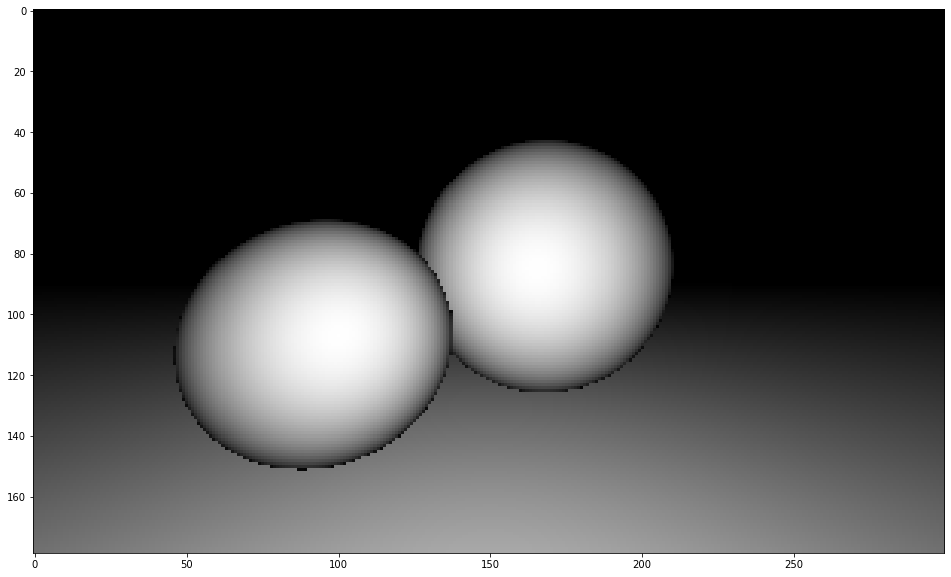

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

class empty():
    def __init__(self):
        return None

def normalize(x):
    x /= np.linalg.norm(x)
    return x

# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------

def render_image (camera, scene, screen, *, status = 5):
    w = screen.w
    h = screen.h
    
    image = np.zeros((h, w, 3))
    
    procents = 0
    if 0 < status <= 100:
        print(0,'%')
        start_t = time.time()
        last_t = start_t
        
    for i in range(h):
        for k in range(w):
            pixel_pos = camera.position + camera.orientate + camera.delta*(camera.dx*(k - w/2) + camera.dy*(h/2 - i))
            ray = normalize(pixel_pos - camera.position)
            normal = scene.get_normal(pixel_pos, ray)
            if normal is not None:
                image[i][k] = np.ones((3))*np.sum(-ray * scene.get_normal(pixel_pos, ray))
                
        
        if 0 < status <= 100:
            if procents < ((i/h)*100) // status:
                tmp = time.time()
                print(i/h*100,'% dt -', tmp - last_t)
                last_t = tmp
                procents = ((i/h)*100) // status
    if 0 < status <= 100:
        end_t = time.time()
        print(100,'% time -', end_t - start_t)
    
    return image

# ------------------------------------------------------------------------------
'''
    ^ y
    |
    |
    |
    o--------> x
   /
  /
 /
L z
'''
# Scene ------------------------------------------------------------------------

my_scene = empty()

def plane(start, ray):
    first_ans = None
    best_t = np.inf
    S = np.array([8,3,-4])
    R = 3
    O = start;
    a = np.dot(ray, ray)
    OS = start - S
    b = 2 * np.dot(ray, OS)
    c = np.dot(OS, OS) - R * R
    disc = b * b - 4 * a * c
    if disc > 0:
        distSqrt = np.sqrt(disc)
        q = (-b - distSqrt) / 2.0 if b < 0 else (-b + distSqrt) / 2.0
        t0 = q / a
        t1 = c / q
        t0, t1 = min(t0, t1), max(t0, t1)
        if t1 >= 0:
            if t0 < 0:
                first_ans = normalize(start + ray*t1 - S)
                best_t = t1
            else:
                first_ans = normalize(start + ray*t0 - S)
                best_t = t0
    S = np.array([13,5,2])
    R = 5
    O = start;
    a = np.dot(ray, ray)
    OS = start - S
    b = 2 * np.dot(ray, OS)
    c = np.dot(OS, OS) - R * R
    disc = b * b - 4 * a * c
    if disc > 0:
        distSqrt = np.sqrt(disc)
        q = (-b - distSqrt) / 2.0 if b < 0 else (-b + distSqrt) / 2.0
        t0 = q / a
        t1 = c / q
        t0, t1 = min(t0, t1), max(t0, t1)
        if t1 >= 0:
            if t0 < 0:
                if best_t > t1:
                    first_ans = normalize(start + ray*t1 - S)
                    best_t = t1
            else:
                if best_t > t0:
                    first_ans = normalize(start + ray*t0 - S)
                    best_t = t0
    if first_ans is not None:
        return first_ans#, start + ray*best_t
    if ray[1]*start[1] >= 0:
        return None#, None
    else:
        return np.array([0,1,0])#, start + ray*(start[1]/ray[1])
    
    
my_scene.get_normal = plane


# ------------------------------------------------------------------------------
# Camera and screen ------------------------------------------------------------

my_camera = empty()
my_camera.position = np.array([0.0, 4.4, 0.0])
my_camera.orientate = np.array([0.1, 0, 0])
my_camera.dx = np.array([0.0, 0.0, 1.0])
my_camera.dy = np.array([0.0, 1.0, 0.0])
my_camera.delta = 0.001

camera_screen = empty()
camera_screen.w = 300
camera_screen.h = 179

# ------------------------------------------------------------------------------
# Run render functon for prepeared scene ---------------------------------------
    
img = render_image(my_camera, my_scene, camera_screen)

#plt.imsave('tmp.png', img)
plt.figure(figsize=(20,10))
plt.imshow(img)